### Probability
* Probability is day to day life is like money assigned on a number line.
* If we are given 100 dollars, how would we assign the hundred dollars to points on the number line, if we are doing discrete things or how would you draw a curve that would say assign how we would distribute money to number line
* Essentially it is a measure of how much we are willing to bet that this thing will take on a particular value for a thing we are interested in
* Example if we are a marketing or new tech firm, we wanted to know about Click Through Rate (CTR), it basically a user comes to the page and clicks in the web page.

### Simulating probabilities
* if the website has a CTR of 50%, i.e., 50% of people click through. If we picked 1000 people at random from population, how likely would it be to find that a certain number of people click?

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* we will take a uniform distrubted population and we will simulate the process of clicking by selecting 1000 random numbers between 0 to 1000 numbers and cutting the threshold somewhere at 50%.

(array([109., 109.,  91.,  86.,  92.,  83., 101., 107., 108., 114.]),
 array([0.00207975, 0.10181029, 0.20154082, 0.30127136, 0.40100189,
        0.50073243, 0.60046296, 0.7001935 , 0.79992403, 0.89965457,
        0.9993851 ]),
 <a list of 10 Patch objects>)

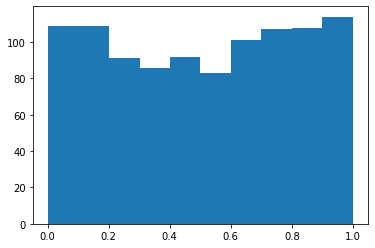

In [9]:
# random 1000 samples uniformally distributed between 0 and 1
x = np.random.rand(1000)
plt.hist(x)

* now we check from uniformly distributed if it less than or equal to 0.5, then it was clicked, otherwise user did not click

In [20]:
clicks = x[x <= 0.5]
number_of_clicks = len(clicks)
print('Number of clicks: {} out of uniformly distributed 1000 samples.'.format(number_of_clicks))

Number of clicks: 487 out of uniformly distributed 1000 samples.


#### Change in click through rate to 70%

In [23]:
clicks = x[x <= 0.7]
number_of_clicks = len(clicks)
print('Number of clicks: {} out of uniformly distributed 1000 samples.'.format(number_of_clicks))
print('Proportion of people who clicked {}'.format(number_of_clicks / len(x)))

Number of clicks: 671 out of uniformly distributed 1000 samples.
Proportion of people who clicked 0.671


* This model simulated by hand is known as 'bias coin flip'

### Galapagos finch beaks
* Simulation on the real world data

In [26]:
df_12 = pd.read_csv('finch_beaks_2012.txt')
print('Shape of the dataframe: ', df_12.shape)
df_12.head()

Shape of the dataframe:  (249, 4)


,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [27]:
# store lengths in a pandas series
beak_length = df_12['blength']

* What is the probability of a bird beak length greater than 10?

In [36]:
len_great_than_10 = beak_length[beak_length > 10]
num_len_great_than_10 = len(len_great_than_10)
print('Number of birds with beak length greater than 10: {}'.format(num_len_great_than_10))
print('Proportion of birds with beak length greater than 10 is :{}'.format(round((num_len_great_than_10 / len(beak_length)), 3)))

Number of birds with beak length greater than 10: 212
Proportion of birds with beak length greater than 10 is :0.851


#### Simulation of finch beak lengths
* Will draw random samples from data and use that as a way to estimate uncertaininty over the probability would be
* If we break the assumption that data is exactly representing the population, then we the results from this data do not represent the results from the population.

In [40]:
n_samples = 10000
simulated_data = np.random.choice(a = beak_length, size = n_samples, replace = True)
num_simulated_data = len(simulated_data[simulated_data > 10])
print('Proportion of birds with beak length greater than 10 is :{}'.format(round((num_simulated_data / len(simulated_data)), 3)))

Proportion of birds with beak length greater than 10 is :0.845


* Coin flips are basically berneuolli trials, every coin flip will have single outcome and can be one of the two possible outcomes which is binary
* If we sum up berneuolli trials, we get binomial distribution 

In [41]:
# set random seet
np.random.seed(42)

In [47]:
# simulate a single flip with bias 0.7 times
np.random.binomial(n = 1, p = 0.7)

1

* In the binomial trial, we are interested in calculating the probability knowing the probability of getting upto that number of successes for that run
* In the above simulation is done once, it is for one potential outcome.
* Now we will simulate the process of flipping the coin 10 times for 10000 times and counting the number of times we got head in each particular experiment

(array([2.22222222e-04, 8.88888889e-04, 1.10000000e-02, 4.05555556e-02,
        1.18777778e-01, 2.18555556e-01, 3.01555556e-01, 2.63000000e-01,
        1.26777778e-01, 2.97777778e-02]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

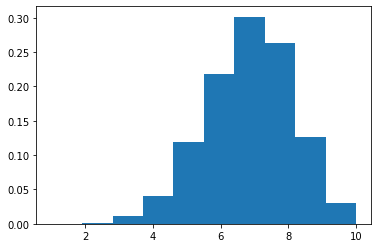

In [58]:
# simulate 10000 run of flipping the biased coin 10 times
x = np.random.binomial(n = 10, p = 0.7, size = 10_000)

#plot normalized histogram of results
plt.hist(x, density = True, bins = 10)

* most probable value is 7, since we have set p = 0.7, the most expected value is 0.7
* Still not enough to see that proportion of trials that we get 1 head only out of 10

* If I flip a biased coin (P(H) = 0.3) 20 times, what is the probability of 5 or more heads?

In [72]:
# calculating the probability of 5 or more heads for p = 0.3
num = np.random.binomial(n = 20, p = 0.3, size = 10_0000)
num_more_than_5 = num[num > 5]
len(num_more_than_5) / 10_0000

0.58225

* If I flip a fair coin (P(H) = 0.5) 20 times, what is the probability of 5 or more heads?

In [77]:
# calculating the probability of 5 or more heads for p = 0.5
num = np.random.binomial(n = 20, p = 0.5, size = 10_0000)
num_more_than_5 = num[num > 5]
len(num_more_than_5) / 10_0000

0.97932

* Plot histogram for flipping the fair coin 10 times

(array([0.0015, 0.0104, 0.0423, 0.117 , 0.2107, 0.2514, 0.1976, 0.1156,
        0.0411, 0.0124]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

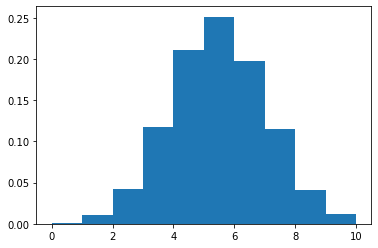

In [89]:
num = np.random.binomial(n = 10, p = 0.5, size = 10_000)

plt.hist(x = num, density = True, bins = 10)

### Emperical cumulative distribution functions (ECDFs)
* This gives much richer information that a histogram, the histogram is nice and convinient to look at, since it sort of tells us the central tendency, but thats all it really tells.
* In ECDF the x-axis is the range of possible values for the data and for any given x-value, the corresponding y-value is the proportion of data points less than or equal to that x-value

In [78]:
def ecdf(data):
    '''function computes ECDF for a one-dimensional array of measurements'''
#      Number of data points
    n = len(data)
    
    # x-data for the ECDF
    x = np.sort(data)
    
    # y-data for ECDF
    y = np.arange(1, n+1)/n
    
    return x, y

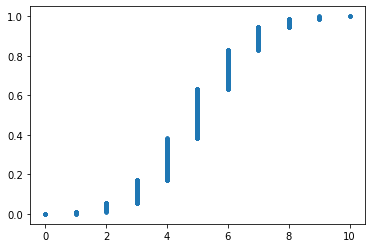

In [90]:
# generating x and y data for ECDF
x_flips, y_flips= ecdf(num)

# plot the ecdf
plt.plot(x_flips, y_flips, marker = '.', linestyle = 'none')

* In the above plot, the probability of getting 5 or higher in our data
    * We go to 5, then we go to bottom y-value for 5, which is approximately around 0.4 in the y-axis, hence the probability of getting 5 or higher is 60%
    
* What is central tendency?
    * we go to 0.5 in the y-axis, and then drag it along the x-axis, the point where this line hits the bar, we go down, in our case the central tendency is 5

* Probability is c